In [173]:
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [174]:
csv_path = Path("Tornado_alley/Resources/us_tornado_dataset_1950_2021.csv")
tornadoes_df = pd.read_csv(csv_path, encoding="UTF-8")
tornadoes_df = tornadoes_df.rename(columns={"yr": "Year", "mag": "Magnitude", "mo": "Month"})
tornadoes_df.head(20)

,Year,Month,dy,date,st,Magnitude,inj,fat,slat,slon,elat,elon,len,wid
0,1950,1,3,1/3/50,IL,3,3,0,39.10,-89.30,39.12,-89.23,3.6,130
1,1950,1,3,1/3/50,MO,3,3,0,38.77,-90.22,38.83,-90.03,9.5,150
2,1950,1,3,1/3/50,OH,1,1,0,40.88,-84.58,0.00,0.00,0.1,10
3,1950,1,13,1/13/50,AR,3,1,1,34.40,-94.37,0.00,0.00,0.6,17
4,1950,1,25,1/25/50,IL,2,0,0,41.17,-87.33,0.00,0.00,0.1,100
5,1950,1,25,1/25/50,MO,2,5,0,37.60,-90.68,37.63,-90.65,2.3,300
6,1950,1,26,1/26/50,TX,2,2,0,26.88,-98.12,26.88,-98.05,4.7,133
7,1950,2,11,2/11/50,TX,2,0,0,29.42,-95.25,29.52,-95.13,9.9,400
8,1950,2,11,2/11/50,TX,2,5,0,32.35,-95.20,32.42,-95.20,4.6,100
9,1950,2,11,2/11/50,TX,2,6,0,32.98,-94.63,33.00,-94.70,4.5,67


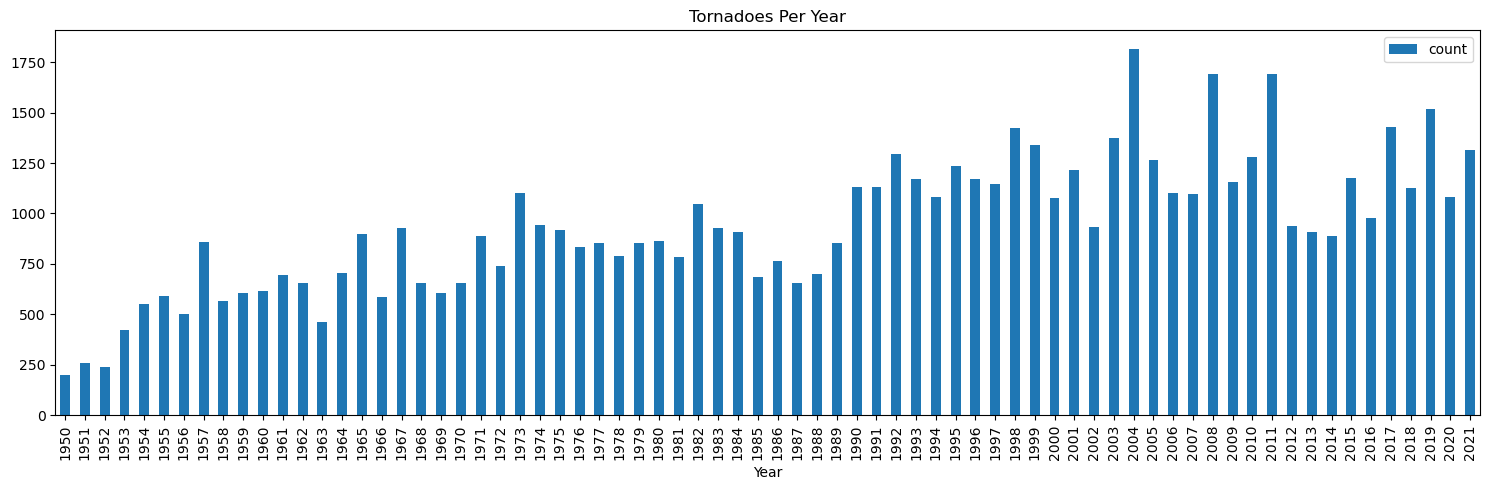

In [194]:
a = tornadoes_df["Year"].value_counts()
b = pd.DataFrame(a)
Torandoes_per_year = b.sort_values("Year")


Torandoes_per_year.plot(kind="bar", figsize=(15, 5))
plt.title("Tornadoes Per Year")
plt.tight_layout()


C:\Users\blake\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


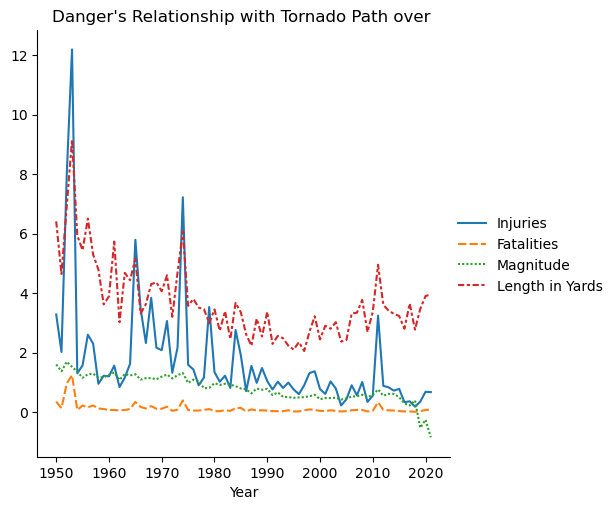

In [193]:
####### Danger's relationship with Tornadoe path length over time #############

A_I_py = tornadoes_df.groupby("Year")["inj"].mean()
AIpy = round(A_I_py, 2)
AIpy_DF = pd.DataFrame(AIpy)

A_F_py = tornadoes_df.groupby("Year")["fat"].mean()
AFpy = round(A_F_py, 2)
AFpy_DF = pd.DataFrame(AFpy)

A_M_py = tornadoes_df.groupby("Year")["Magnitude"].mean()
AMpy = round(A_M_py, 2)
AMpy_DF = pd.DataFrame(AMpy)

A_L_py = tornadoes_df.groupby("Year")["len"].mean()
ALpy = round(A_L_py, 2)
ALpy_DF = pd.DataFrame(ALpy)

A_W_py = tornadoes_df.groupby("Year")["wid"].mean()
AWpy = round(A_W_py, 2)
AWpy_DF = pd.DataFrame(AWpy)
Merge12 = pd.merge(AIpy_DF, AFpy_DF, on="Year")
Merged123 = pd.merge(Merge12, AMpy_DF, on="Year")
Merged_Danger_df = pd.merge(Merged123, ALpy_DF, on="Year")

Merged_Danger_df = Merged_Danger_df.rename(columns={"inj": "Injuries", "fat": "Fatalities", "mag": "Magnitude", "len": "Length in Yards"})

sns.relplot(data=Merged_Danger_df, kind="line").set(title="Danger's Relationship with Tornado Path over ")

C:\Users\blake\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


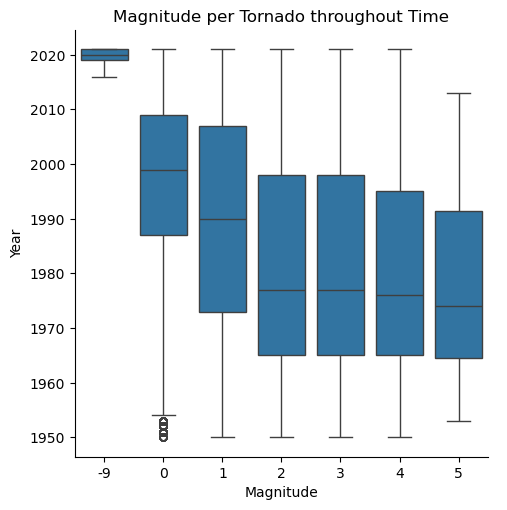

In [192]:
sns.catplot(data=tornadoes_df, x="Magnitude", y="Year", kind="box").set(title="Magnitude per Tornado throughout Time")

In [151]:
tornadoes_df

,Year,Month,dy,date,st,Magnitude,inj,fat,slat,slon,elat,elon,len,wid
0,1950,1,3,1/3/50,IL,3,3,0,39.1000,-89.3000,39.1200,-89.2300,3.60,130
1,1950,1,3,1/3/50,MO,3,3,0,38.7700,-90.2200,38.8300,-90.0300,9.50,150
2,1950,1,3,1/3/50,OH,1,1,0,40.8800,-84.5800,0.0000,0.0000,0.10,10
3,1950,1,13,1/13/50,AR,3,1,1,34.4000,-94.3700,0.0000,0.0000,0.60,17
4,1950,1,25,1/25/50,IL,2,0,0,41.1700,-87.3300,0.0000,0.0000,0.10,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67553,2021,12,30,12/30/21,GA,1,0,0,31.1703,-83.3804,31.1805,-83.3453,2.19,150
67554,2021,12,30,12/30/21,GA,1,0,0,31.6900,-82.7300,31.7439,-82.5412,11.71,300
67555,2021,12,31,12/31/21,AL,1,0,0,34.2875,-85.7878,34.2998,-85.7805,0.95,50
67556,2021,12,31,12/31/21,GA,1,0,0,33.7372,-84.9998,33.7625,-84.9633,2.75,150
